# Neural Networks baseline

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
train_pd = pd.read_csv("train_2022.csv")
train_pd.head()

,Document,Sentence,population,intervention,background,outcome,study design,other,Text
0,145506,1,0,0,1,0,0,0,The rare liquor leakage syndrome with cranial ...
1,145506,2,0,0,1,0,0,0,This does not occur after a suboccipital punct...
2,145506,3,1,0,0,0,0,0,A report is given on three cases with differen...
3,145506,4,0,0,0,1,0,0,The prognosis of the eye-muscle paresis is good.
4,145506,5,0,0,0,1,0,0,Restitutio ad integrum resulted.


In [3]:
labels = ['population','intervention','background','outcome','study design','other']
label_counts = []
for l in labels:
    counts = train_pd[l].sum()
    label_counts.append(counts)
print(label_counts)

[584, 501, 1777, 3192, 167, 2424]


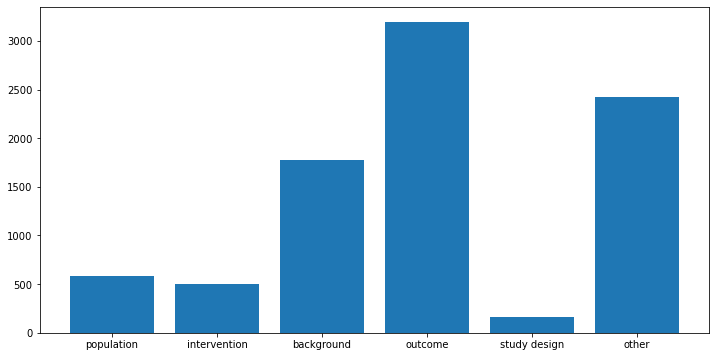

In [4]:
plt.figure(figsize=(12,6))
plt.bar(range(6), label_counts)
plt.xticks(range(6), labels)
plt.show()

In [5]:
n=len(train_pd)
n

8216

## Neural Networks

The following code trains a simple neural network that uses an output layer with a sigmoid activation function. 

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras import models, layers

labels = ['population','intervention','background','outcome','study design','other']
nb = dict()

tfidf = TfidfVectorizer(input='contents', max_features=10000)
train_tfidf = tfidf.fit_transform(train_pd['Text']).toarray()

simple_nn = models.Sequential()
simple_nn.add(layers.Dense(6, activation='sigmoid', input_shape=(len(tfidf.get_feature_names()),)))
simple_nn.summary()

2022-10-04 18:40:32.544629: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-04 18:40:32.850336: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-04 18:40:32.909694: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2022-10-04 18:40:32.909710: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above c

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 60006     
                                                                 
Total params: 60,006
Trainable params: 60,006
Non-trainable params: 0
_________________________________________________________________


2022-10-04 18:40:34.512892: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2022-10-04 18:40:34.513094: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-04 18:40:34.513113: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (SCI-10648): /proc/driver/nvidia/version does not exist
2022-10-04 18:40:34.513749: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
simple_nn.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [9]:
from random import shuffle
import numpy as np
history=simple_nn.fit(train_tfidf,
                      np.array(train_pd[labels]),
                      epochs=70,
                      batch_size=32,
                      validation_split=0.2)

Epoch 1/70
206/206 [==============================] - 1s 2ms/step - loss: 0.6246 - accuracy: 0.5108 - val_loss: 0.5708 - val_accuracy: 0.5408
Epoch 2/70
206/206 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.5292 - val_loss: 0.4894 - val_accuracy: 0.5438
Epoch 3/70
206/206 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.5306 - val_loss: 0.4340 - val_accuracy: 0.5499
Epoch 4/70
206/206 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.5405 - val_loss: 0.3968 - val_accuracy: 0.5566
Epoch 5/70
206/206 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.5505 - val_loss: 0.3714 - val_accuracy: 0.5687
Epoch 6/70
206/206 [==============================] - 0s 2ms/step - loss: 0.3525 - accuracy: 0.5638 - val_loss: 0.3540 - val_accuracy: 0.5760
Epoch 7/70
206/206 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.5814 - val_loss: 0.3412 - val_accuracy: 0.5864
Epoch 

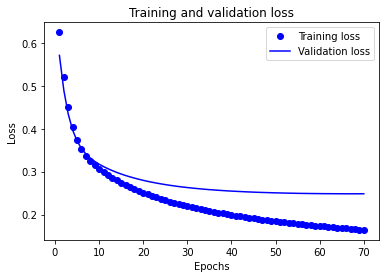

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The following code applies the Naive Bayes models to the validation data, and saves the result in a CSV file for submission.

In [11]:
test_pd = pd.read_csv("val_2022.csv")
test_pd.head()

,Document,Sentence,population,intervention,background,outcome,study design,other,Text
0,2545507,1,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2545507,2,NaN,NaN,NaN,NaN,NaN,NaN,Field electrical stimulation elicited an incre...
2,2545507,3,NaN,NaN,NaN,NaN,NaN,NaN,2
3,2545507,4,NaN,NaN,NaN,NaN,NaN,NaN,"This efflux was: (a) reduced by clonidine, NA ..."
4,2545507,5,NaN,NaN,NaN,NaN,NaN,NaN,3


In [12]:
test_tfidf = tfidf.transform(test_pd['Text']).toarray()
test_probabilities = simple_nn.predict(test_tfidf)
test_pd[labels] = test_probabilities
test_pd.head()

15/15 [==============================] - 0s 868us/step


,Document,Sentence,population,intervention,background,outcome,study design,other,Text
0,2545507,1,0.402771,0.506255,0.412654,0.340045,0.414168,0.830021,1
1,2545507,2,0.071321,0.079583,0.230629,0.495375,0.006145,0.043400,Field electrical stimulation elicited an incre...
2,2545507,3,0.402771,0.506255,0.412654,0.340045,0.414168,0.830021,2
3,2545507,4,0.038771,0.351922,0.114256,0.802764,0.000165,0.030584,"This efflux was: (a) reduced by clonidine, NA ..."
4,2545507,5,0.402771,0.506255,0.412654,0.340045,0.414168,0.830021,3


In [13]:
test_pd.to_csv('nn_val_2022_probabilities.csv', index=False)

<AxesSubplot:>

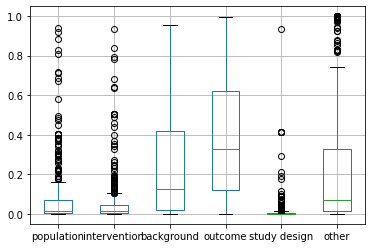

In [14]:
test_pd.boxplot(column=labels)

And now, with the test data

In [15]:
test_pd = pd.read_csv("test_2022.csv")
test_pd.head()

,Document,Sentence,population,intervention,background,outcome,study design,other,Text
0,1079261,1,NaN,NaN,NaN,NaN,NaN,NaN,The 14th myelographically demonstrated case of...
1,1079261,2,NaN,NaN,NaN,NaN,NaN,NaN,In most cases lumbosacral nerve root avulsion ...
2,1079261,3,NaN,NaN,NaN,NaN,NaN,NaN,This force causes nerve root avulsion in the i...
3,1079261,4,NaN,NaN,NaN,NaN,NaN,NaN,The myelographic defect is a pseudomeningocele...
4,1079261,5,NaN,NaN,NaN,NaN,NaN,NaN,Myelography clearly indicates nerve root avuls...


In [16]:
test_tfidf = tfidf.transform(test_pd['Text']).toarray()
test_probabilities = simple_nn.predict(test_tfidf)
test_pd[labels] = test_probabilities
test_pd.head()

18/18 [==============================] - 0s 2ms/step


,Document,Sentence,population,intervention,background,outcome,study design,other,Text
0,1079261,1,0.049799,0.014252,0.305480,0.380675,0.001539,0.013902,The 14th myelographically demonstrated case of...
1,1079261,2,0.016394,0.016325,0.766958,0.277476,0.000198,0.005137,In most cases lumbosacral nerve root avulsion ...
2,1079261,3,0.088933,0.171325,0.411566,0.423378,0.015374,0.092106,This force causes nerve root avulsion in the i...
3,1079261,4,0.128921,0.553242,0.560365,0.338635,0.017608,0.259229,The myelographic defect is a pseudomeningocele...
4,1079261,5,0.011791,0.036120,0.238760,0.568133,0.003401,0.047286,Myelography clearly indicates nerve root avuls...


In [17]:
test_pd.to_csv('nn_test_2022_probabilities.csv', index=False)

<AxesSubplot:>

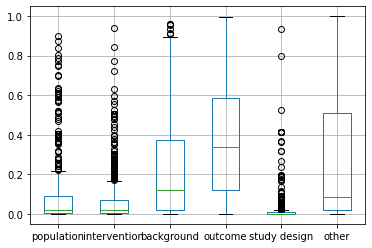

In [18]:
test_pd.boxplot(column=labels)